In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report ,accuracy_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [348]:
data =pd.read_csv('Maternal Health Risk Data Set.csv')
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [349]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


(1014, 7)

In [350]:
# changing the output name and converting gender to 1 and 0
data.rename(columns = {'RiskLevel':'Output'}, inplace = True)
data['Output'].replace(['high risk', 'low risk','mid risk'],[0, 1,2], inplace=True)
#dataset.head(50)
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Output
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1


In [351]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
Output         0
dtype: int64

In [352]:
print("Total Rows: ",data.shape[0])
print("Total columns: ",data.shape[1])

Total Rows:  1014
Total columns:  7


In [353]:
data.Output.value_counts()

1    406
2    336
0    272
Name: Output, dtype: int64

In [354]:
print(f"There are {data.duplicated().sum()} duplicates data")
data.loc[data.duplicated(keep=False)].sort_values(by=data.columns.to_list())

There are 562 duplicates data


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Output
670,10,100,50,6.0,99.0,70,2
849,10,100,50,6.0,99.0,70,2
552,12,90,60,7.5,102.0,60,1
940,12,90,60,7.5,102.0,60,1
543,12,90,60,7.5,102.0,66,1
...,...,...,...,...,...,...,...
553,60,120,85,15.0,98.0,60,2
772,60,120,85,15.0,98.0,60,2
818,60,120,85,15.0,98.0,60,2
114,63,140,90,15.0,98.0,90,0


In [355]:
#Method for removing the highly corelated feature
def removeHighlyCorFeatures(dataset, th):
  corr_matrix = dataset.corr().abs()
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
  to_drop = [column for column in upper.columns if any(upper[column] > th)]
  print(to_drop)
  dataset.drop(to_drop, axis=1, inplace=True)

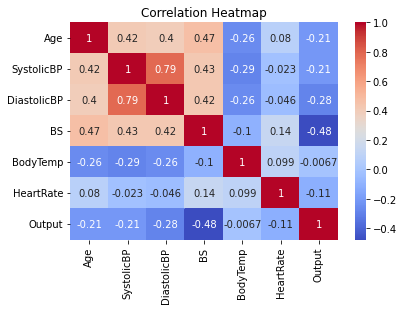

In [356]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [357]:
#calling the highly correllated feature method.
x = data.iloc[:, 0:-1]
removeHighlyCorFeatures(x, 0.8)
x.shape

[]


(1014, 6)

In [358]:
print(data.duplicated)

<bound method DataFrame.duplicated of       Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  Output
0      25         130           80  15.0      98.0         86       0
1      35         140           90  13.0      98.0         70       0
2      29          90           70   8.0     100.0         80       0
3      30         140           85   7.0      98.0         70       0
4      35         120           60   6.1      98.0         76       1
...   ...         ...          ...   ...       ...        ...     ...
1009   22         120           60  15.0      98.0         80       0
1010   55         120           90  18.0      98.0         60       0
1011   35          85           60  19.0      98.0         86       0
1012   43         120           90  18.0      98.0         70       0
1013   32         120           65   6.0     101.0         76       2

[1014 rows x 7 columns]>


In [359]:
data = data.drop_duplicates()

In [360]:
data.Output.value_counts()

1    234
0    112
2    106
Name: Output, dtype: int64

In [361]:
data.shape

(452, 7)

In [362]:
data.Output.value_counts()

1    234
0    112
2    106
Name: Output, dtype: int64

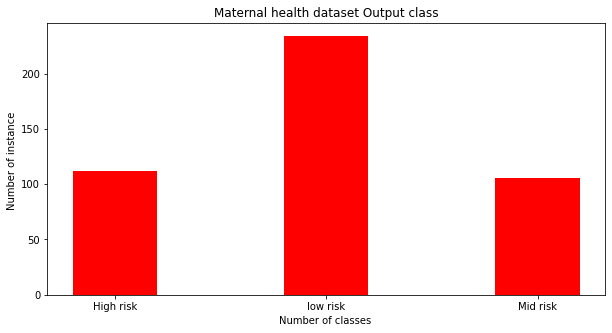

In [363]:
# creating the dataset
courses = ["High risk", "low risk","Mid risk"]
values = [sum(data["Output"] == 0), sum(data["Output"] == 1),sum(data["Output"] == 2)]
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='red', width = 0.4)
plt.xlabel("Number of classes ")
plt.ylabel("Number of instance ")
plt.title("Maternal health dataset Output class")
plt.show()

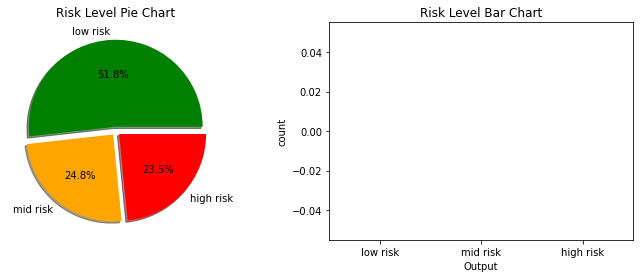

In [364]:
p_colors = ['green', 'orange', 'red']
risk_order = ["low risk", "mid risk", "high risk"]
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

data["Output"].value_counts().plot(kind="pie", labels=risk_order, colors=p_colors, explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Risk Level Pie Chart")
ax[0].set_ylabel('')

count = sns.countplot(x="Output", data=data, ax=ax[1], order=risk_order, palette=p_colors)
for bar in count.patches:
    count.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=11, xytext=(0, 8),
        textcoords='offset points')
ax[1].set_title("Risk Level Bar Chart")
plt.show()

In [365]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,452.0,29.194690,13.767379,10.0,19.0,25.0,35.0,70.0
SystolicBP,452.0,110.553097,17.872282,70.0,90.0,120.0,120.0,160.0
DiastolicBP,452.0,75.418142,13.754578,49.0,65.0,80.0,86.0,100.0
BS,452.0,8.346173,2.829209,6.0,6.9,7.5,7.9,19.0
BodyTemp,452.0,98.692478,1.410897,98.0,98.0,98.0,98.0,103.0
HeartRate,452.0,73.949115,8.156973,7.0,70.0,76.0,80.0,90.0
Output,452.0,0.986726,0.695121,0.0,1.0,1.0,1.0,2.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53229c5c70>,
      dtype=object)

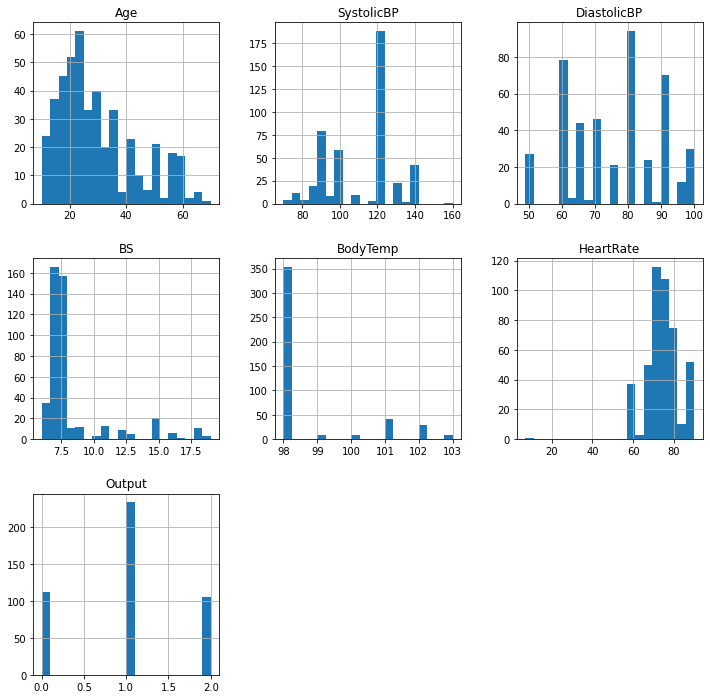

In [366]:
data.hist(figsize=(12,12),bins=20)

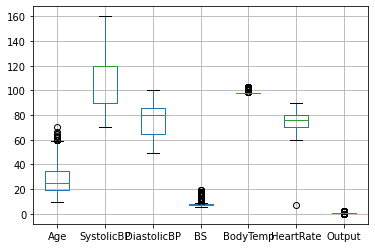

In [367]:
data.boxplot()

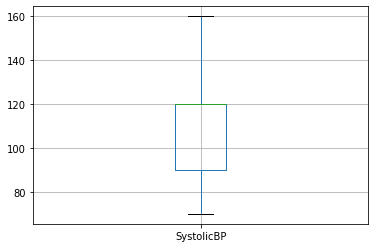

In [368]:
data[['SystolicBP']].boxplot()
plt.show()

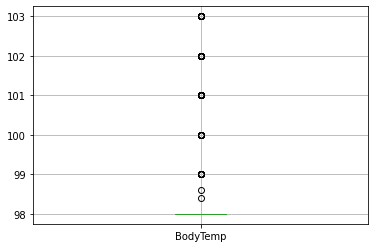

In [369]:
data[['BodyTemp']].boxplot()
plt.show()

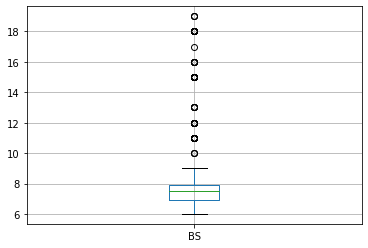

In [370]:
data[['BS']].boxplot()
plt.show()

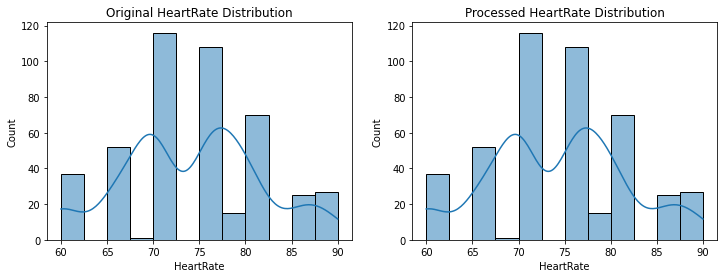

In [371]:
data = data.drop(data.index[data.HeartRate == 7])

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=data, x="HeartRate", kde=True, ax=ax[0])
sns.histplot(data=data, x="HeartRate", kde=True, ax=ax[1])
ax[0].set_title("Original HeartRate Distribution")
ax[1].set_title("Processed HeartRate Distribution")
plt.show()

In [372]:
# Original Dataset
X = data.drop("Output", axis=1)
y = data.Output
x_train, x_test, y_train, y_test = split(X, y, test_size=0.2, random_state=1)


In [373]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

In [374]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)

[[0.18333333 0.55555556 0.60784314 0.06923077 0.         0.93333333]
 [0.11666667 0.16666667 0.21568627 0.11538462 0.6        0.86666667]
 [0.08333333 0.33333333 0.21568627 0.         0.         0.66666667]
 ...
 [0.21666667 0.33333333 0.70588235 0.09900797 0.         0.2       ]
 [0.26666667 0.55555556 0.60784314 0.06153846 0.         0.2       ]
 [0.33333333 0.51111111 0.21568627 0.0980457  0.41456264 0.73333333]]


In [375]:
data.Output.value_counts()

1    233
0    112
2    106
Name: Output, dtype: int64

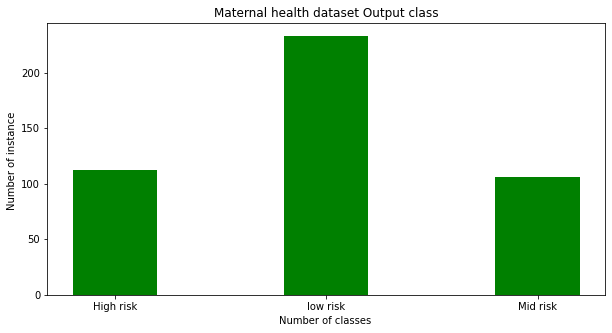

In [376]:
# creating the dataset
courses = ["High risk", "low risk","Mid risk"]
values = [sum(data["Output"] == 0), sum(data["Output"] == 1),sum(data["Output"] == 2)]
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='green', width = 0.4)
plt.xlabel("Number of classes ")
plt.ylabel("Number of instance ")
plt.title("Maternal health dataset Output class")
plt.show()

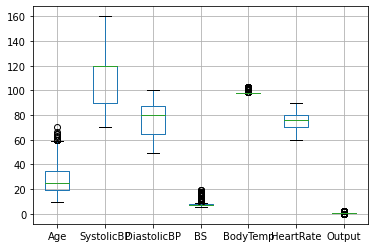

In [377]:
data.boxplot()

In [378]:

rf = RandomForestClassifier(random_state=100)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.6923076923076923


In [379]:
params = {
    "n_estimators": [10, 20, 50, 100],
    "criterion": ["gini", "entropy"]
}
rf = RandomForestClassifier(random_state=100)
grid = GridSearchCV(rf, params, cv=10)
grid.fit(x_train, y_train)
print("Best hyperparameter:", grid.best_params_)

Best hyperparameter: {'criterion': 'entropy', 'n_estimators': 50}


In [380]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")[["params", "mean_test_score", "rank_test_score"]]

,params,mean_test_score,rank_test_score
6,"{'criterion': 'entropy', 'n_estimators': 50}",0.733515,1
3,"{'criterion': 'gini', 'n_estimators': 100}",0.733485,2
7,"{'criterion': 'entropy', 'n_estimators': 100}",0.731821,3
2,"{'criterion': 'gini', 'n_estimators': 50}",0.726588,4
5,"{'criterion': 'entropy', 'n_estimators': 20}",0.721385,5
0,"{'criterion': 'gini', 'n_estimators': 10}",0.719631,6
1,"{'criterion': 'gini', 'n_estimators': 20}",0.714398,7
4,"{'criterion': 'entropy', 'n_estimators': 10}",0.712674,8


In [381]:
y_pred = grid.predict(x_test)
print(f"Processed Dataset Accuracy: {accuracy_score(y_test, y_pred)}")

Processed Dataset Accuracy: 0.7032967032967034


In [382]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

lr = LogisticRegression()
  
# train the model on train set
lr.fit(x_train, y_train.ravel())
  
predictions = lr.predict(x_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.46      0.60        26
           1       0.60      0.69      0.64        42
           2       0.31      0.39      0.35        23

    accuracy                           0.55        91
   macro avg       0.59      0.51      0.53        91
weighted avg       0.60      0.55      0.56        91



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [383]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model = XGBClassifier(random_state=100)
model.fit(x_train, y_train)
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.7472527472527473


In [384]:
 roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')

0.8441843048611508

In [385]:
model.save_model("xgBoost.json")

In [386]:
x_train.shape

(573, 6)

In [387]:
# Using processed dataset
rf2 = RandomForestClassifier(random_state=100)
rf2.fit(x_train, y_train)
y_pred = rf2.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.6923076923076923


In [388]:
import joblib

In [389]:
joblib.dump(rf2, "model.pkl")

['model.pkl']

In [390]:
roc_auc_score(y_test, rf2.predict_proba(x_test), multi_class='ovr')

0.8136088607959632

In [391]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#creating RandomForestClassifier constructor
rnd = RandomForestClassifier()
# fit data
fit_rnd = rnd.fit(x_train,y_train)
# predicting score
rnd_score = rnd.score(x_test,y_test)
print(rnd_score)

0.7032967032967034


In [392]:
 roc_auc_score(y_test, rnd.predict_proba(x_test), multi_class='ovr')

0.8002030611208061

In [393]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(acc)


0.6153846153846154


In [394]:
 roc_auc_score(y_test, classifier.predict_proba(x_test), multi_class='ovr')

0.777671389895711

In [395]:
mean_acc = np.zeros(50)
for i in range(1,51):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat= knn.predict(x_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.63736264, 0.63736264, 0.56043956, 0.62637363, 0.59340659,
       0.59340659, 0.53846154, 0.61538462, 0.61538462, 0.64835165,
       0.58241758, 0.59340659, 0.58241758, 0.64835165, 0.59340659,
       0.6043956 , 0.6043956 , 0.58241758, 0.6043956 , 0.59340659,
       0.52747253, 0.52747253, 0.56043956, 0.57142857, 0.56043956,
       0.58241758, 0.53846154, 0.53846154, 0.53846154, 0.57142857,
       0.54945055, 0.54945055, 0.54945055, 0.53846154, 0.52747253,
       0.54945055, 0.53846154, 0.53846154, 0.53846154, 0.53846154,
       0.50549451, 0.53846154, 0.52747253, 0.59340659, 0.56043956,
       0.59340659, 0.62637363, 0.59340659, 0.6043956 , 0.58241758])

In [396]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
# fit the model on our train set
g_res = gs.fit(x_train, y_train)
g_res.best_score_


Fitting 3 folds for each of 36 candidates, totalling 108 fits


0.6963350785340315

In [397]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

In [398]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.5604395604395604


In [399]:
 roc_auc_score(y_test, clf.predict_proba(x_test), multi_class='ovr')

0.6496444898417059

In [400]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6263736263736264


In [401]:
 roc_auc_score(y_test, clf.predict_proba(x_test), multi_class='ovr')

0.7842419489510433